# Prova Pratica e Recupero Esoneri - Metodi AI e Machine Learning per la fisica 
### 07.07.2021 - AA 2020/21 - Docente: S. Giagu


> **Regole:**

*   **tempo a disposizione:** 
> recupero esonero 1 o 2: 2h <p>
> prova pratica completa: 3h30'


*   compilare con i vostri dati i campi della cella che segue e poi eseguire la cella verificando che i dati printati corrispondano
*   risolvere i quesiti/compiti indicati nella cella *Descrizione del compito* usando questo notebook 
*   una volta completato il compito sottomettere il notebook nel apposito folder sul sito e-learning del corso disponibile al link: [consegna esonero](https://elearning.uniroma1.it/mod/assign/view.php?id=408347)(NOTA BENE: una volta sottomesso il notebook non sono più possibili ulteriori modifiche)


In [ ]:
#@ Dati Personali
import os

Nome = 'Stefano'  #@param {type: "string"}
Cognome = 'Giagu' #@param {type: "string"}
NumeroMatricola = 123456789 #@param {type: "number"}

if NumeroMatricola == 12345678:
  print('\033[1;31m Inserisci il numero di matricola corretto!!!!') 
else:
  print('Downloading datasets')
  !rm -rf PM25_data.csv
  !wget http://giagu.web.cern.ch/giagu/CERN/PM25_data.csv 
  print('Done')

--2021-07-07 08:04:53--  http://giagu.web.cern.ch/giagu/CERN/PM25_data.csv
Resolving giagu.web.cern.ch (giagu.web.cern.ch)... 188.185.90.198, 2001:1458:d00:41::100:151
Connecting to giagu.web.cern.ch (giagu.web.cern.ch)|188.185.90.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1385468 (1.3M) [text/csv]
Saving to: ‘PM25_data.csv’

PM25_data.csv       100%[===================>]   1.32M  1.75MB/s    in 0.8s    

2021-07-07 08:04:54 (1.75 MB/s) - ‘PM25_data.csv’ saved [1385468/1385468]

Done


# **Descrizione del compito:**



### Dataset:

La task relativa al recupero primo esonero richiede di produrre un dataset artificiale come indicato nella descrizione del compito riportata più avanti.

La task relativa al recupero secondo esonero utilizza il dataset scaricabile eseguendo, dopo aver inserito i dati, la cella precedente. Il dataset è costituito da un file in formato .csv: "*PM25_data.csv*" costituito da 8 colonne (features) per 43824 righe (eventi/misure). Il dataset rappresenta misure di parametri legati al'inquinamento atmosferico presi da opportune centraline di misura ogni ora nell'arco di un certo numero di anni in una specifica città. Le feature disponibili sono:

* pm2.5: PM2.5 concentration (ug/m^3)
* DEWP: Dew Point 
* TEMP: Temperature
* PRES: Pressure (hPa)
* cbwd: Combined wind direction (codificato tramite interi)
* Iws: Cumulated wind speed (m/s)
* Is: Cumulated hours of snow
* Ir: Cumulated hours of rain


# **È richiesto:**

**Recupero primo esonero:**
> rispondere alle domande 1,2 e 3

**Recupero secondo esonero:**
> rispondere alle domande 4,5, e 6

**Intera prova pratica:**
> rispondere alle domande 1,2,4,5, e 6


1.   produrre un dataset artificiale costituito da 3000 eventi per il training e 2000 eventi per il test che rappresenti diverse sovrapposizioni di segnali sinusoidali nel dominio del tempo e la loro corrispettiva trasformata di fourier nel dominio delle frequenze. Nello specifico ciascun evento deve essere costituito da una feature e da due target distinti: target_1 e target_2. 
> la feature è costituita da un vettore a 50 componenti in cui ogni componente rappresenta un campionamento della funzione sinusoidale g(t) con t dato da 50 valori equispaziati nell'intervallo (-\pi, \pi). <p> La funzione sinusoidale g(t) deve avere la forma: <p>$g(t) = \sum_{i=1}^{n} f_i \sin(k_i \cdot t)$, <p> in cui $n$ è un numero random intero estratto uniformememente in $[1,2]$ che rappresenta quanti componenti sinusoidali sono presenti in g(t), <p> $k_i$ è un numero intero random estratto uniformemente in $[1,20]$ che rappresenta la frequenza associata alla specifica componente sinusoidale, <p>  $f_i$ è una frazione random estratta uniforme in $[0,1]$ tale che $\sum{i=1}^{n} f_i = 1$, che pesa i diversi contributi sinusoidali in g(t).
> target_1 è costituito da un vettore a 1 componente che ha come valori il numero di componenti sinusoidali $n$ presenti nel evento;
> target_2 è costituito da un vettore che rappresenta la trasformata discreta di fourier della funzione $g(t)$ ed è ottenibile dal vettore di feature usando la funzione di numpy *np.fft.rfft(vettore di feature)*. <p> 
Esempio uso:
> 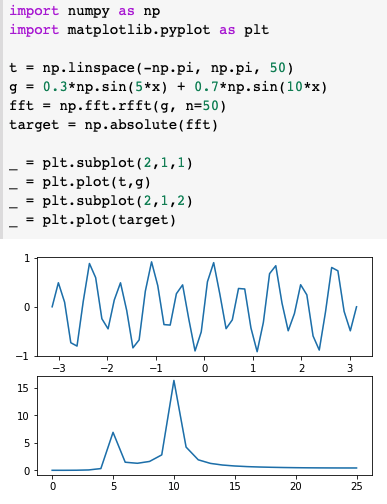

2.  addestrare un regressore basato su RandomForest per predire il target_1 a partire dagli eventi nello spazio dei tempi (feature), e stimarne le prestazioni
3.  addestrare un regressore multi-output basato sempre su RandomForest per predire il target_2 a partire dagli eventi nello spazio dei tempi (feature), e stimarne le prestazioni. Plottare per due esempi di eventi la distribuzione del ground truth (target_2) con sovrapposta la predizione del modello addestrato.

---------------------------------------------------------

4. leggere il dataset *PM25_data.csv*, visualizzare l'andamento in funzione del tempo delle diverse feature, e visualizzare la matrice di correlazione tra le feature del dataset, commentando brevemente i risultati
5. addestrare una rete ricorrente (RNN) alla task di predire, sulla base della sequenza di misure delle feature del campione fatte nelle 192 ore precedenti, il valore del parametro "pm2.5" 10 ore dopo l'ultima misura della sequenza
6.  valutare e visualizzare le prestazioni dell'algoritmo con i metodi che si ritengono più utili.

Commentare in modo sintetico le scelte e operazioni eseguite nello svolgimento dei vari punti del compito.

In [ ]:
# esempio risposta domanda 1 (la risposte alle domande 2 è standard (addestramento di un regressore random forest))
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 50)
data = []
target1 = []
for i in range(7000):
  n = np.random.randint(1,3)
  o = np.random.randint(1,20, size=n)
  o = np.sort(o)
  f = np.random.uniform(size=n)
  f = f/f.sum()
  c = 0
  for k in range(0,n):
    c = c + f[k]*np.sin(o[k]*x)
  data.append(c)
  target1.append(n)

target1 = np.array(target1)
data = np.array(data)
target2 = np.fft.rfft(data, n=50)
target2 = np.absolute(target2)
print(data.shape)
print(target1.shape)
print(target2.shape)

(7000, 50)
(7000,)
(7000, 26)


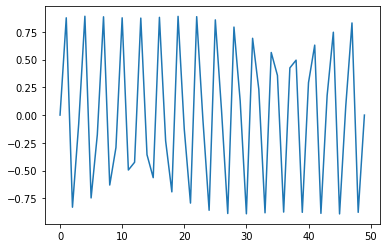

In [ ]:
plt.plot(data[10])

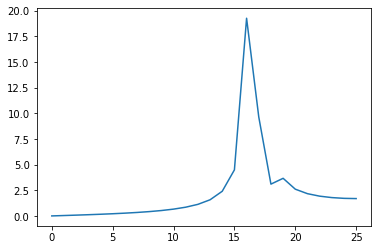

In [ ]:
plt.plot(target2[10])

In [ ]:
print(target1[10])

2


In [ ]:
#esempio risposta domanda 3
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=50,
                                                          min_samples_split=5,
                                                          random_state=0))

regr_multirf.fit(data[:1000], target2[:1000])

MultiOutputRegressor(estimator=RandomForestRegressor(min_samples_split=5,
                                                     n_estimators=50,
                                                     random_state=0))

In [ ]:
pred = regr_multirf.predict(data)

from sklearn.metrics import mean_absolute_error
print('mae: ', mean_absolute_error(target2[1000:], pred[1000:]))

mae:  0.21758769283406593


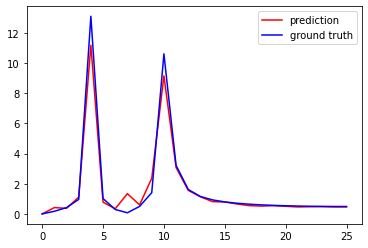

In [ ]:
plt.plot(pred[1100], 'r-', label='prediction')
plt.plot(target2[1100], 'b-', label='ground truth')
plt.legend()